----

## Introducción

En el presente proyecto, realizaremos un análisis exhaustivo de los datos provenientes del departamento analítico de Y.Afisha con el objetivo de optimizar los gastos de marketing. Y.Afisha, una plataforma digital, ha proporcionado registros detallados de visitas, pedidos y gastos de marketing para el periodo comprendido entre enero de 2017 y diciembre de 2018. Nuestro análisis se centrará en entender el comportamiento de los clientes, evaluar el rendimiento de las campañas de marketing y proporcionar recomendaciones para mejorar la rentabilidad de las inversiones en marketing.

El proyecto se divide en varias etapas, comenzando con la descarga y preparación de los datos, seguidos por informes y cálculos de métricas clave, y finalmente, la formulación de conclusiones y recomendaciones estratégicas. A continuación, se detallan los objetivos específicos de nuestro análisis:

1. Visitas:
   - Determinar la cantidad de usuarios diarios, semanales y mensuales.
   - Evaluar la cantidad de sesiones por día y su duración.
   - Analizar la frecuencia de retorno de los usuarios.
 
 
2. Ventas:
   - Identificar cuándo los usuarios comienzan a realizar compras.
   - Analizar el número de pedidos realizados en diferentes periodos.
   - Calcular el tamaño promedio de las compras.
   - Determinar el valor de vida del cliente (LTV).


3. Marketing:
   - Evaluar el total de dinero gastado en marketing, desglosado por fuente de adquisición y a lo largo del tiempo.
   - Calcular el costo de adquisición de clientes por cada fuente.
   - Analizar la rentabilidad de las inversiones en marketing (ROMI).
 
 
Los datos utilizados en este análisis provienen de tres conjuntos de datos: registros de visitas, datos de pedidos y estadísticas de gastos de marketing. A lo largo del análisis, se presentarán gráficos y visualizaciones que ilustren cómo varían estas métricas según diferentes dispositivos, fuentes de anuncios y a lo largo del tiempo.

El resultado final de este proyecto será una serie de recomendaciones estratégicas dirigidas a los expertos de marketing de Y.Afisha sobre cómo invertir de manera más eficiente en sus campañas de marketing. Estas recomendaciones se basarán en un análisis detallado de las métricas clave, asegurando una toma de decisiones informada y basada en datos.

## Descargar los datos y prepararlos para el 


### Importar las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Descargar los datos (las primeras 500 filas)

In [2]:
# Descargar las primeras 500 filas del dataset de visitas
visits_sample = pd.read_csv('/datasets/visits_log_us.csv', nrows=500)

### Analizar los datos

In [3]:
# Analizar la información del dataset
visits_sample.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


### Optimizar las columnas de los datos

- Device: Convertir a tipo category
- Start Ts y End Ts: Convertir a tipo datetime

In [4]:
# Convertir la columna 'Device' a tipo category
visits_sample['Device'] = visits_sample['Device'].astype('category')

# Convertir las columnas de fechas a tipo datetime
visits_sample['Start Ts'] = pd.to_datetime(visits_sample['Start Ts'], format="%Y-%m-%d %H:%M:%S")
visits_sample['End Ts'] = pd.to_datetime(visits_sample['End Ts'], format="%Y-%m-%d %H:%M:%S")

# Analizar de nuevo la información del dataset después de la optimización
visits_sample.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Device     500 non-null    category      
 1   End Ts     500 non-null    datetime64[ns]
 2   Source Id  500 non-null    int64         
 3   Start Ts   500 non-null    datetime64[ns]
 4   Uid        500 non-null    uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 16.5 KB


### Descargar el dataset completo con los tipos de datos optimizados

In [5]:
# Descargar el dataset completo con los tipos de datos optimizados
visits = pd.read_csv(
    '/datasets/visits_log_us.csv',
    dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts']
)

orders = pd.read_csv(
    '/datasets/orders_log_us.csv',
    parse_dates=['Buy Ts']
)

costs = pd.read_csv(
    '/datasets/costs_us.csv',
    parse_dates=['dt']
)

# Renombrar las columnas a snake_case
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

# Verificar la información de los datasets completos
print("Información del dataset de visitas:")
visits.info(memory_usage='deep')

print("\nInformación del dataset de pedidos:")
orders.info(memory_usage='deep')

print("\nInformación del dataset de costos:")
costs.info(memory_usage='deep')

Información del dataset de visitas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB

Información del dataset de pedidos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2

## Informes y métricas 

### Métricas de Visitas

####  ¿Cuántas personas lo usan cada día, semana y mes?

In [6]:
# Usuarios únicos por día
users_per_day = visits.groupby(visits['start_ts'].dt.date)['uid'].nunique()

# Usuarios únicos por semana
users_per_week = visits.groupby(visits['start_ts'].dt.to_period('W'))['uid'].nunique()

# Usuarios únicos por mes
users_per_month = visits.groupby(visits['start_ts'].dt.to_period('M'))['uid'].nunique()

# Mostrar resultados
print("Usuarios únicos por día:")
print(users_per_day.head())

print("\nUsuarios únicos por semana:")
print(users_per_week.head())

print("\nUsuarios únicos por mes:")
print(users_per_month.head())

Usuarios únicos por día:
start_ts
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: uid, dtype: int64

Usuarios únicos por semana:
start_ts
2017-05-29/2017-06-04    2021
2017-06-05/2017-06-11    4129
2017-06-12/2017-06-18    2812
2017-06-19/2017-06-25    2878
2017-06-26/2017-07-02    3064
Freq: W-SUN, Name: uid, dtype: int64

Usuarios únicos por mes:
start_ts
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Freq: M, Name: uid, dtype: int64


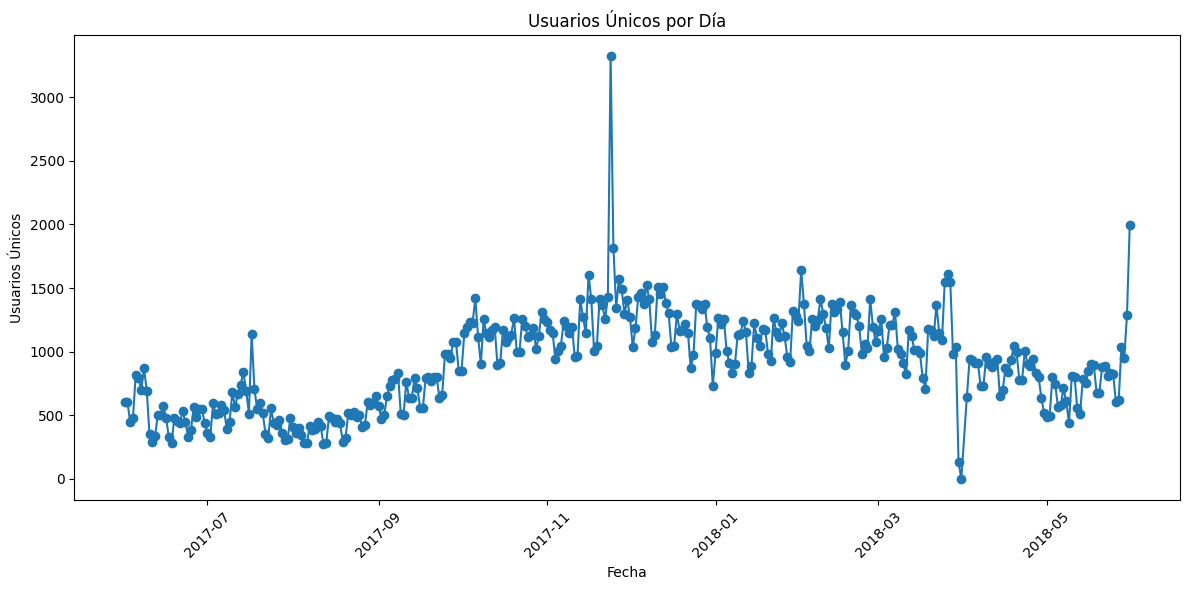

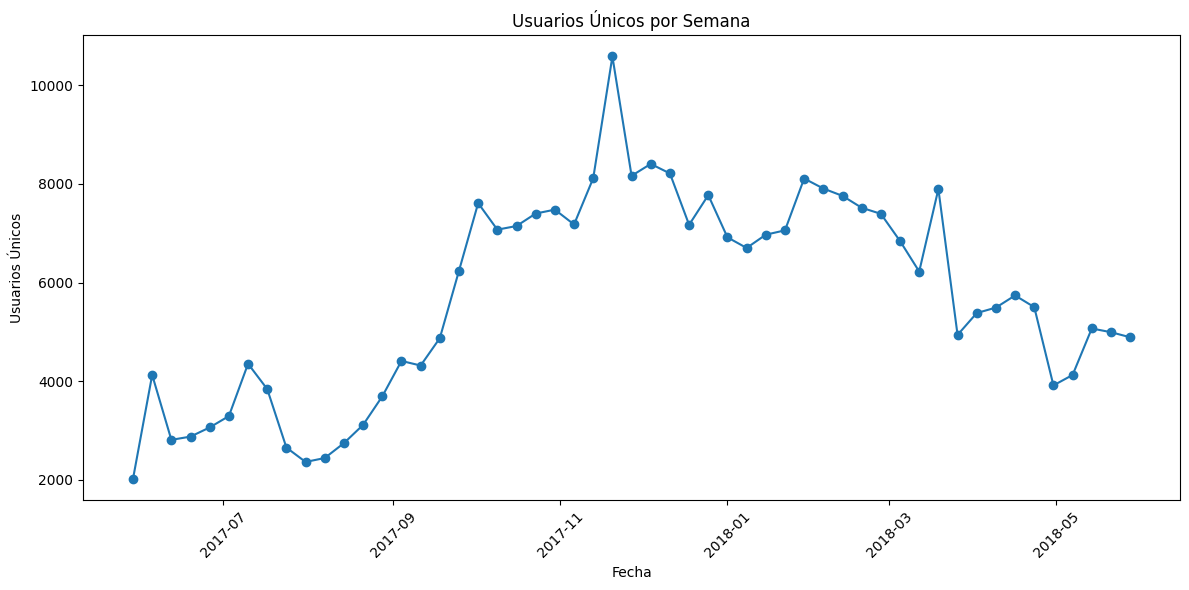

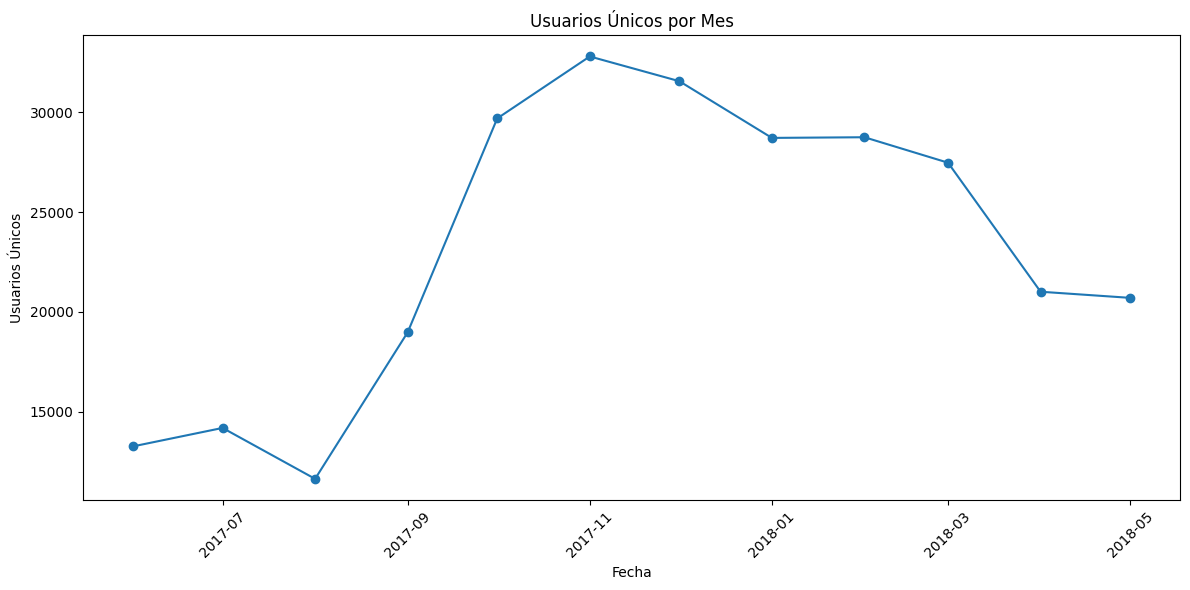

In [7]:
# Gráfico de usuarios únicos por día
plt.figure(figsize=(12, 6))
plt.plot(users_per_day.index, users_per_day.values, marker='o', linestyle='-')
plt.title('Usuarios Únicos por Día')
plt.xlabel('Fecha')
plt.ylabel('Usuarios Únicos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de usuarios únicos por semana
plt.figure(figsize=(12, 6))
plt.plot(users_per_week.index.to_timestamp(), users_per_week.values, marker='o', linestyle='-')
plt.title('Usuarios Únicos por Semana')
plt.xlabel('Fecha')
plt.ylabel('Usuarios Únicos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de usuarios únicos por mes
plt.figure(figsize=(12, 6))
plt.plot(users_per_month.index.to_timestamp(), users_per_month.values, marker='o', linestyle='-')
plt.title('Usuarios Únicos por Mes')
plt.xlabel('Fecha')
plt.ylabel('Usuarios Únicos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### ¿Cuántas sesiones hay por día?

In [8]:
# Sesiones por día
sessions_per_day = visits.groupby(visits['start_ts'].dt.date).size()

# Mostrar resultados
print("\nSesiones por día:")
print(sessions_per_day.head())


Sesiones por día:
start_ts
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
dtype: int64


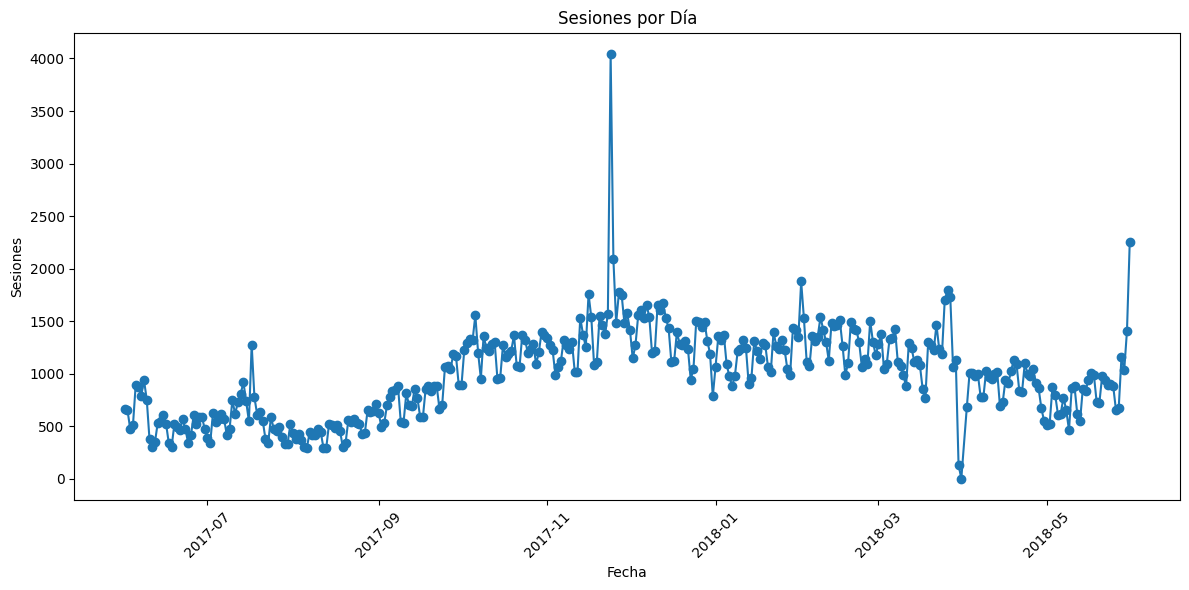

In [9]:
# Gráfico de sesiones por día
plt.figure(figsize=(12, 6))
plt.plot(sessions_per_day.index, sessions_per_day.values, marker='o', linestyle='-')
plt.title('Sesiones por Día')
plt.xlabel('Fecha')
plt.ylabel('Sesiones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### ¿Cuál es la duración promedio de cada sesión?


Duración de cada sesión (en minutos):
                    uid  session_duration
0  16879256277535980062              18.0
1    104060357244891740              28.0
2   7459035603376831527               0.0
3  16174680259334210214              24.0
4   9969694820036681168               0.0

Duración promedio de la sesión: 10.72 minutos
Moda de la duración de la sesión: 1.00 minutos


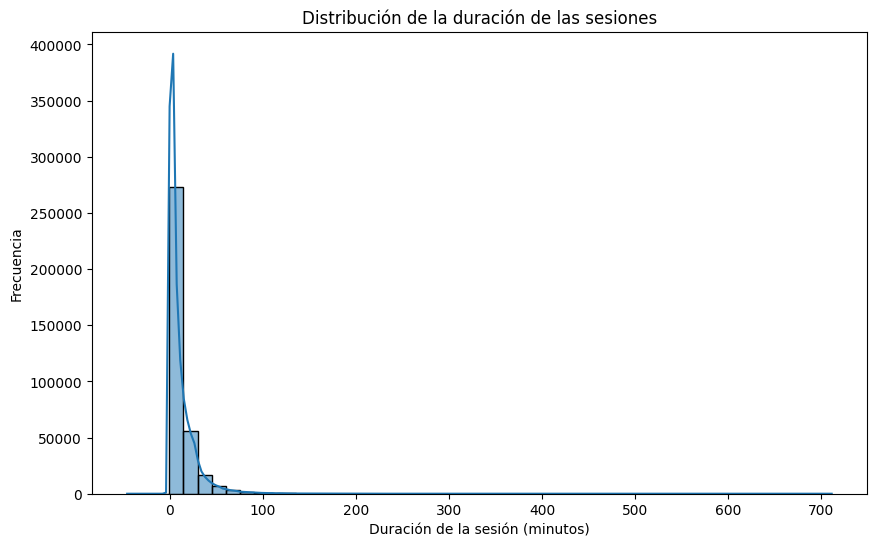

In [10]:
# Calcular la duración de cada sesión en minutos
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60

# Calcular la media y la moda de la duración de las sesiones
mean_duration = visits['session_duration'].mean()
mode_duration = visits['session_duration'].mode()[0]

# Mostrar algunas duraciones de sesiones
print("\nDuración de cada sesión (en minutos):")
print(visits[['uid', 'session_duration']].head())

# Mostrar la media y la moda
print(f"\nDuración promedio de la sesión: {mean_duration:.2f} minutos")
print(f"Moda de la duración de la sesión: {mode_duration:.2f} minutos")

# Crear un gráfico de la duración de las sesiones
plt.figure(figsize=(10, 6))
sns.histplot(visits['session_duration'], bins=50, kde=True)
plt.title('Distribución de la duración de las sesiones')
plt.xlabel('Duración de la sesión (minutos)')
plt.ylabel('Frecuencia')
plt.show()

#### ¿Con qué frecuencia los usuarios regresan?

In [11]:
# Ordenar por uid y fecha de inicio de la sesión
visits_sorted = visits.sort_values(by=['uid', 'start_ts'])

# Calcular el tiempo desde la última sesión para cada usuario
visits_sorted['time_since_last_session'] = visits_sorted.groupby('uid')['start_ts'].diff()

# Convertir el tiempo a días (total_seconds() da segundos, dividido por 3600 segundos/hora, 24 horas/día)
visits_sorted['time_since_last_session_days'] = visits_sorted['time_since_last_session'] / pd.Timedelta(days=1)

# Calcular la frecuencia de retorno promedio por usuario
return_frequency_per_user = visits_sorted.groupby('uid')['time_since_last_session_days'].mean()

# Filtrar los usuarios con valores no nulos
return_frequency_per_user_valid = return_frequency_per_user.dropna()

# Mostrar resultado filtrado
print("\nFrecuencia de retorno promedio por usuario (días) - Usuarios con valores no nulos:")
print(return_frequency_per_user_valid.head())

# Estadísticas adicionales
print("\nEstadísticas adicionales:")
print(return_frequency_per_user_valid.describe())


Frecuencia de retorno promedio por usuario (días) - Usuarios con valores no nulos:
uid
313578113262317      86.886806
325320750514679     148.919444
526778907996220      55.924769
577434573913691       6.161806
1260655184775459     43.325000
Name: time_since_last_session_days, dtype: float64

Estadísticas adicionales:
count    52128.000000
mean        41.118179
std         55.967486
min          0.000000
25%          2.194271
50%         19.090278
75%         57.027604
max        361.530556
Name: time_since_last_session_days, dtype: float64


### Métricas de ventas

####  ¿Cuándo la gente empieza a comprar?

In [12]:
# Calcular la fecha de la primera visita de cada usuario
first_visit = visits.groupby('uid')['start_ts'].min().reset_index()
first_visit.columns = ['uid', 'first_visit']

# Unir con la tabla de pedidos para obtener la fecha de la primera compra
first_order = pd.merge(first_visit, orders.groupby('uid')['buy_ts'].min().reset_index(), on='uid', how='left')
first_order.columns = ['uid', 'first_visit', 'first_order']

# Calcular el tiempo transcurrido entre la primera visita y la primera compra
first_order['time_to_first_order'] = (first_order['first_order'] - first_order['first_visit']).dt.days

# Categorizar las conversiones
def categorize_conversion(time):
    if pd.isnull(time):
        return 'No compró'
    elif time == 0:
        return 'Conversion 0d'
    elif time == 1:
        return 'Conversion 1d'
    elif time <= 7:
        return 'Conversion 1w'
    else:
        return 'Conversion más de 1w'

first_order['conversion_category'] = first_order['time_to_first_order'].apply(categorize_conversion)

# Mostrar resultados
print("\nCategorización de conversiones:")
print(first_order['conversion_category'].value_counts())


Categorización de conversiones:
No compró               191646
Conversion 0d            26363
Conversion más de 1w      7080
Conversion 1w             2069
Conversion 1d             1011
Name: conversion_category, dtype: int64


#### ¿Cuántos pedidos hacen durante un período de tiempo dado?


Total de pedidos realizados: 50415

Frecuencia de pedidos por día:
order_date
2017-06-01     96
2017-06-02    111
2017-06-03     67
2017-06-04     66
2017-06-05    161
dtype: int64

Frecuencia de pedidos por semana:
buy_ts
2017-06-04    340
2017-06-11    938
2017-06-18    343
2017-06-25    371
2017-07-02    460
Freq: W-SUN, dtype: int64

Frecuencia de pedidos por mes:
buy_ts
2017-06-30    2354
2017-07-31    2363
2017-08-31    1807
2017-09-30    3387
2017-10-31    5679
Freq: M, dtype: int64


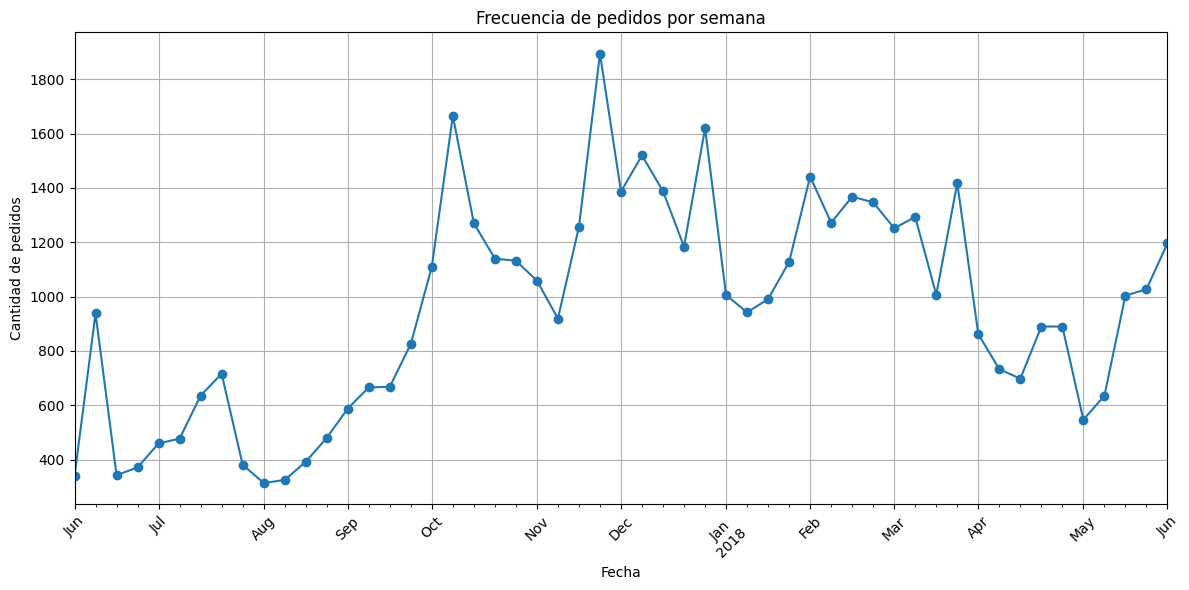

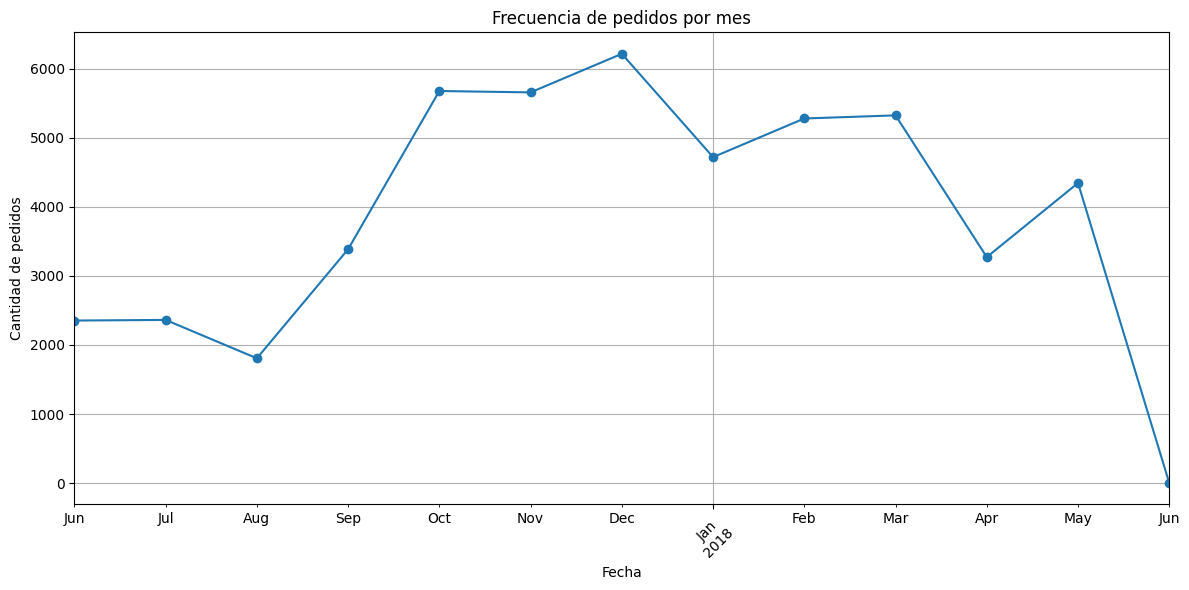

In [13]:
# Total de pedidos
total_orders = orders.shape[0]

# Frecuencia de pedidos por día, semana y mes
orders['order_date'] = orders['buy_ts'].dt.date
daily_orders = orders.groupby('order_date').size()
weekly_orders = orders.resample('W', on='buy_ts').size()
monthly_orders = orders.resample('M', on='buy_ts').size()

# Mostrar resultados
print("\nTotal de pedidos realizados:", total_orders)
print("\nFrecuencia de pedidos por día:")
print(daily_orders.head())
print("\nFrecuencia de pedidos por semana:")
print(weekly_orders.head())
print("\nFrecuencia de pedidos por mes:")
print(monthly_orders.head())

# Crear gráfico de línea para la frecuencia de pedidos por semana
plt.figure(figsize=(12, 6))
weekly_orders.plot(marker='o')
plt.title('Frecuencia de pedidos por semana')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# Crear gráfico de línea para la frecuencia de pedidos por mes
plt.figure(figsize=(12, 6))
monthly_orders.plot(marker='o')
plt.title('Frecuencia de pedidos por mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

#### ¿Cuál es el tamaño promedio de compra?

In [14]:
# Tamaño promedio de compra
avg_order_size = orders['revenue'].mean()

# Calcular el tamaño promedio de compra por usuario
avg_order_size_per_user = orders.groupby('uid')['revenue'].mean()

# Mostrar resultado
print("\nTamaño promedio de compra por usuario:")
print(avg_order_size_per_user.head())  # Muestra las primeras filas para visualizar
print("\nTamaño promedio de compra en general:", avg_order_size)


Tamaño promedio de compra por usuario:
uid
313578113262317      0.550
1575281904278712     1.525
2429014661409475    73.330
2464366381792757     2.440
2551852515556206     5.495
Name: revenue, dtype: float64

Tamaño promedio de compra en general: 4.999646930477041


#### ¿Cuánto dinero traen? (LTV)

In [15]:
# Obtener la fecha de la primera compra por usuario
first_purchase = orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase.columns = ['uid', 'first_purchase_date']

# Crear columna con el mes de la primera compra
first_purchase['first_purchase_month'] = first_purchase['first_purchase_date'].dt.to_period('M')

# Unir con la tabla de pedidos para tener el mes de la compra y la fecha de la primera compra
orders_with_cohort = pd.merge(orders, first_purchase, on='uid')

# Crear columna con el mes de la compra
orders_with_cohort['order_month'] = orders_with_cohort['buy_ts'].dt.to_period('M')

# Calcular la edad de la cohorte en meses
orders_with_cohort['cohort_age'] = (orders_with_cohort['order_month'] - orders_with_cohort['first_purchase_month']).apply(lambda x: x.n)

# Contar cuántos usuarios hay en cada cohorte
cohort_sizes = orders_with_cohort.groupby('first_purchase_month')['uid'].nunique().reset_index()
cohort_sizes.columns = ['first_purchase_month', 'cohort_size']

# Crear tabla para calcular LTV
ltv_table = orders_with_cohort.groupby(['first_purchase_month', 'cohort_age'])['revenue'].sum().reset_index()

# Unir con la tabla de tamaños de cohortes
ltv_table = pd.merge(ltv_table, cohort_sizes, on='first_purchase_month')

# Calcular LTV
ltv_table['ltv'] = ltv_table['revenue'] / ltv_table['cohort_size']

# Crear tabla pivote para visualizar LTV acumulado por cohortes
ltv_table_pivot = ltv_table.pivot_table(
    index='first_purchase_month', 
    columns='cohort_age',
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)  # Acumular el LTV a lo largo de los meses de la cohorte

# Mostrar la tabla pivote de LTV acumulado
print(ltv_table_pivot)

cohort_age                  0         1         2          3          4   \
first_purchase_month                                                       
2017-06               4.724414  5.209743  5.647380   6.602051   7.624582   
2017-07               6.010218  6.345429  6.968960   7.327936   7.504727   
2017-08               5.276518  5.748511  6.206993   6.598270   7.092321   
2017-09               5.644529  6.762115  7.283045  11.258838  11.659396   
2017-10               5.003733  5.539495  5.730889   5.888035   6.039594   
2017-11               5.154683  5.553916  5.753472   6.078424   6.226437   
2017-12               4.738191  4.998565  5.923662   6.988937   7.301866   
2018-01               4.135636  4.430394  4.734675   4.877453   4.940151   
2018-02               4.156987  4.435262  4.513777   4.587921        NaN   
2018-03               4.838803  5.139694  5.455253        NaN        NaN   
2018-04               4.657597  5.189196       NaN        NaN        NaN   
2018-05     

### Métricas de Marketing

#### ¿Cuánto dinero se gastó?


Total de gastos en marketing: 329131.62

Gastos por fuente de adquisición:
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


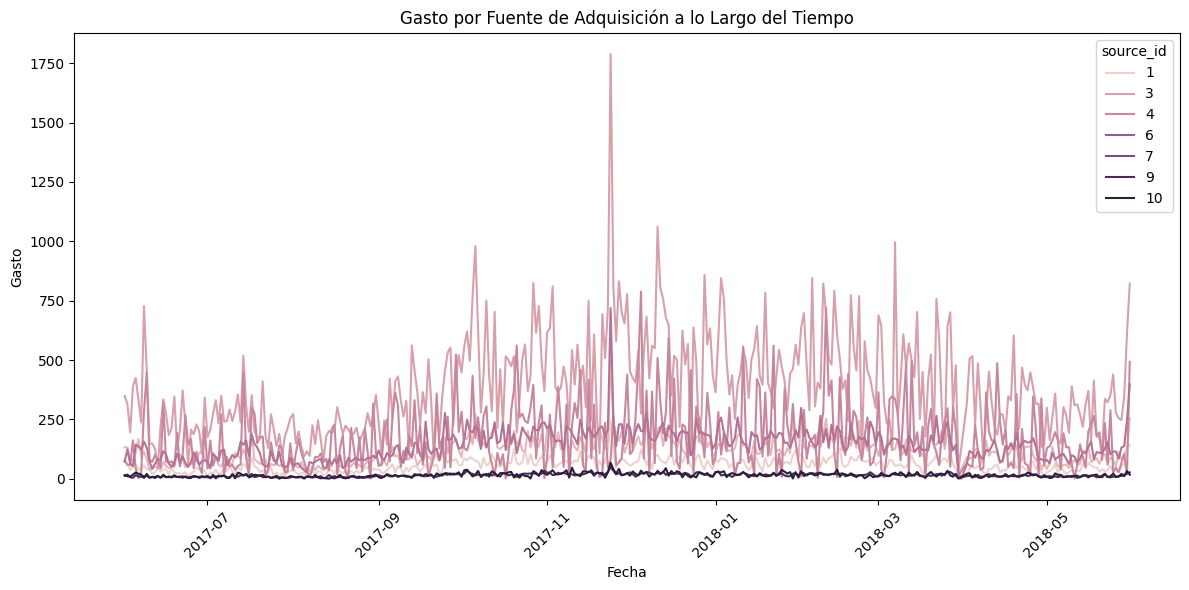

In [16]:
# Total de gastos en marketing
total_costs = costs['costs'].sum()

# Gastos por fuente de adquisición
costs_by_source = costs.groupby('source_id')['costs'].sum()

# Mostrar resultados
print("\nTotal de gastos en marketing:", total_costs)
print("\nGastos por fuente de adquisición:")
print(costs_by_source)

# Agrupar y sumar los costos por fecha y fuente de adquisición
monthly_costs = costs.groupby(['dt', 'source_id'])['costs'].sum().reset_index()

# Graficar usando seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='dt', y='costs', hue='source_id', data=monthly_costs)
plt.title('Gasto por Fuente de Adquisición a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Gasto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [17]:
# Obtener la fecha de la primera compra por usuario
first_purchase = orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase.columns = ['uid', 'first_purchase_date']

# Crear columna con el mes de la primera compra
first_purchase['first_purchase_month'] = first_purchase['first_purchase_date'].dt.to_period('M')

# Transformar 'first_purchase_date' a solo fecha (sin hora)
first_purchase['first_purchase_date'] = first_purchase['first_purchase_date'].dt.date

# Obtener la fuente de la primera visita por usuario
users_first_source = pd.merge(first_visit, visits, on='uid', how='inner')
users_first_source = users_first_source.groupby('uid').first().reset_index()[['uid', 'source_id']]

# Unir datos de primera compra con la fuente de la primera visita
orders_with_cohort = pd.merge(orders, first_purchase, on='uid')

# Transformar 'buy_ts' a solo fecha (sin hora) para la coherencia
orders_with_cohort['buy_ts'] = orders_with_cohort['buy_ts'].dt.date

# Unir con la fuente de la primera visita
orders_with_cohort = pd.merge(orders_with_cohort, users_first_source, on='uid', how='left')

# Contar la cantidad de compradores por fuente y fecha de primera compra
buyers_by_source_date = orders_with_cohort.groupby(['source_id', 'first_purchase_date'])['uid'].nunique().reset_index()
buyers_by_source_date.columns = ['source_id', 'first_purchase_date', 'buyers']

# Unir con los costos de marketing por fuente y fecha
costs['dt'] = costs['dt'].dt.date  # Asegurarse de que 'dt' esté en formato de solo fecha
cac_data = pd.merge(buyers_by_source_date, costs, left_on=['source_id', 'first_purchase_date'], right_on=['source_id', 'dt'])

# Calcular el CAC diario
cac_data['CAC'] = cac_data['costs'] / cac_data['buyers']

# Obtener el CAC promedio por fuente
cac_by_source = cac_data.groupby('source_id')['CAC'].mean().reset_index()

# Mostrar resultados de CAC por fuente de adquisición
print("\nCAC promedio por fuente de adquisición:")
print(cac_by_source)


CAC promedio por fuente de adquisición:
   source_id        CAC
0          1   7.201965
1          2  12.602180
2          3  18.018357
3          4   7.527701
4          5   8.390910
5          9   5.441105
6         10   7.088165


####  Rentabilidad de las inversiones (ROMI)

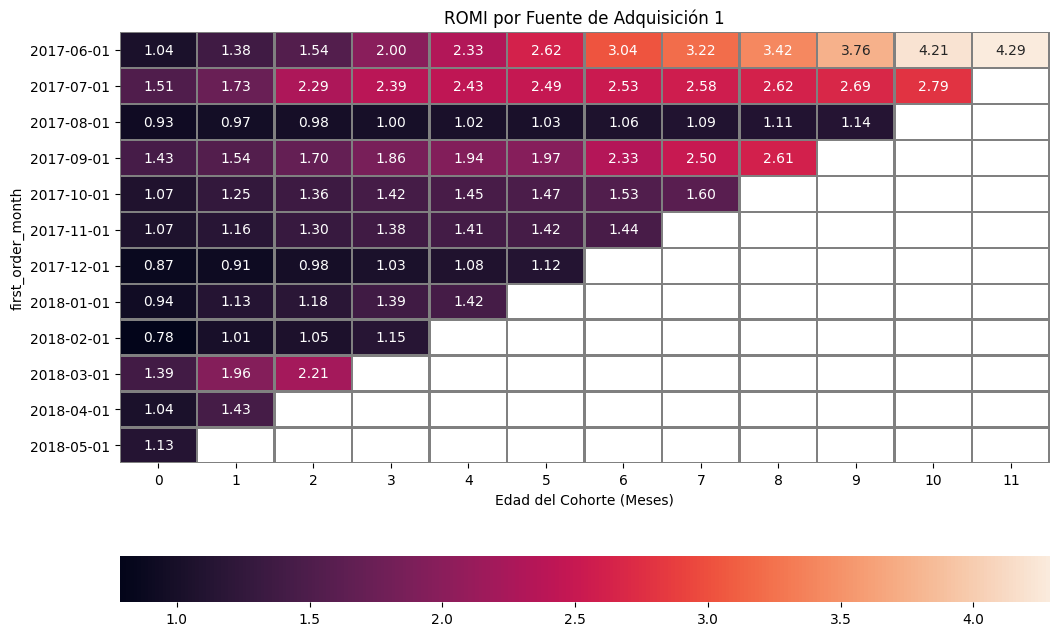

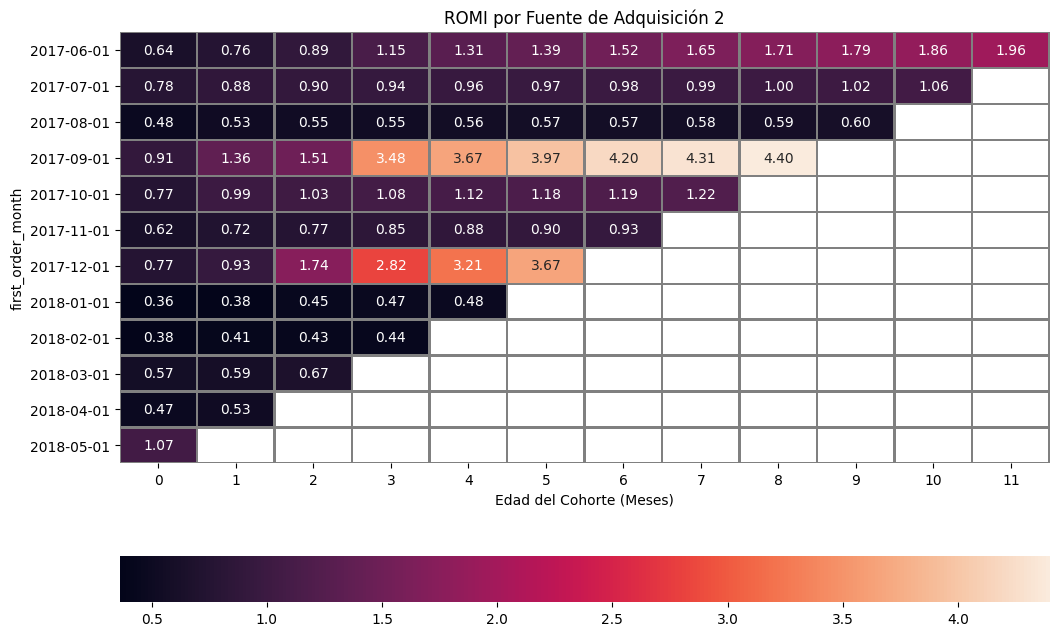

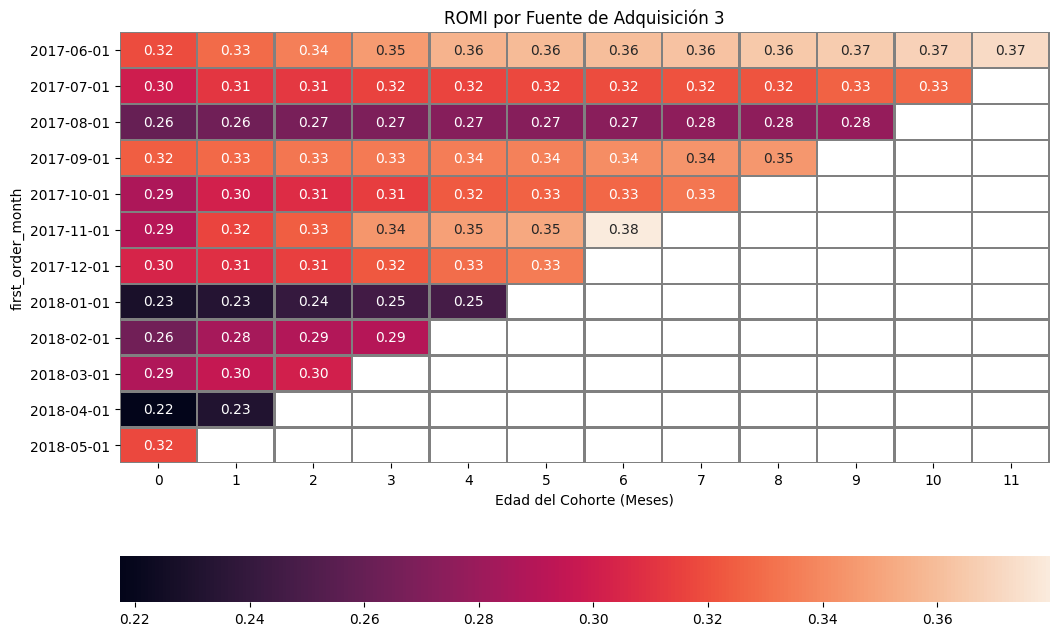

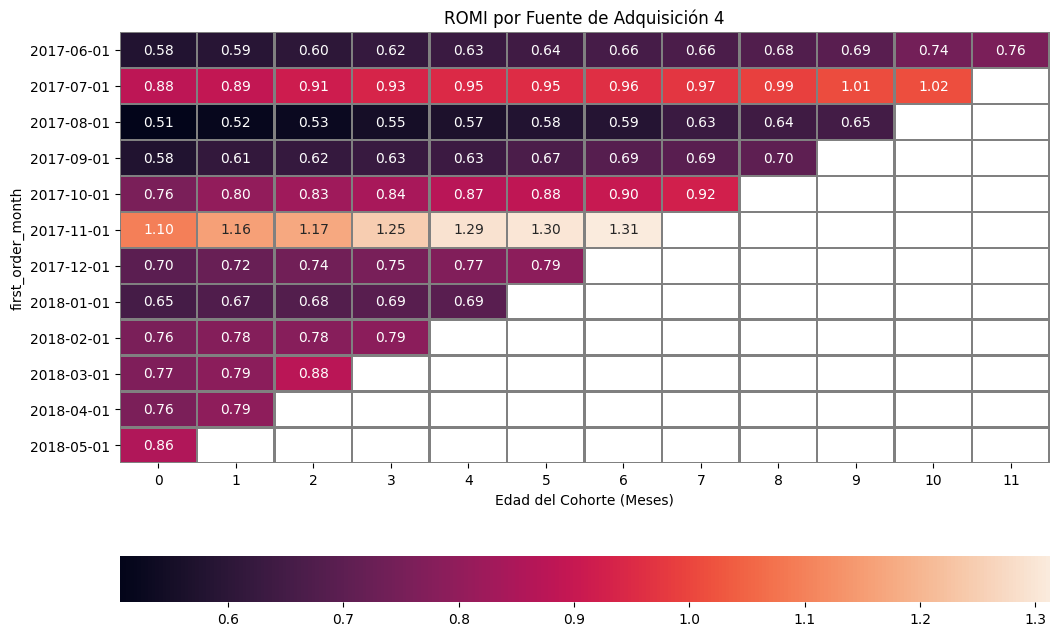

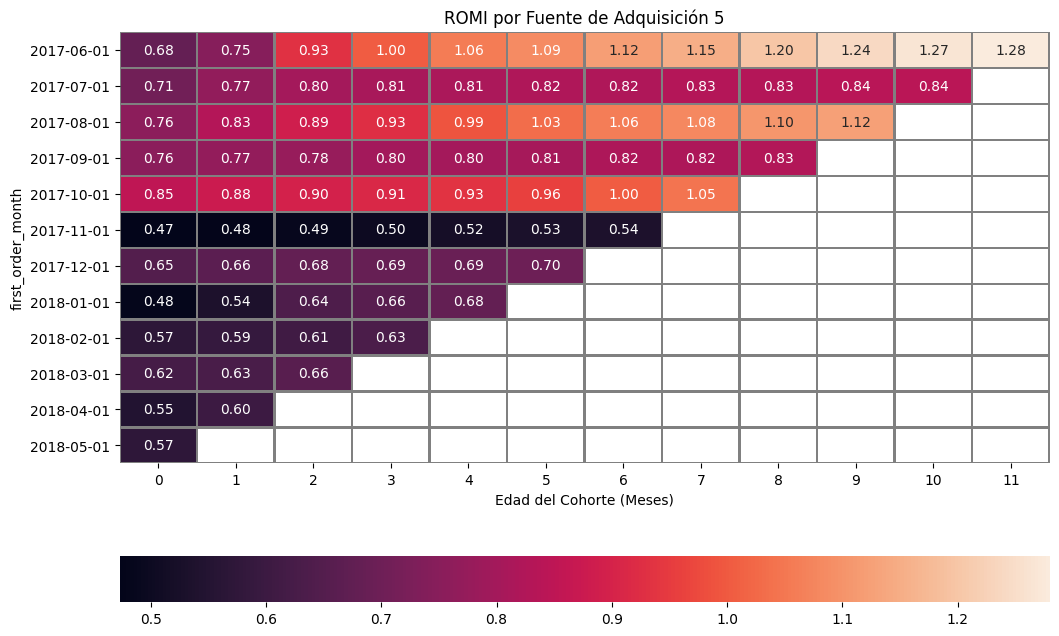

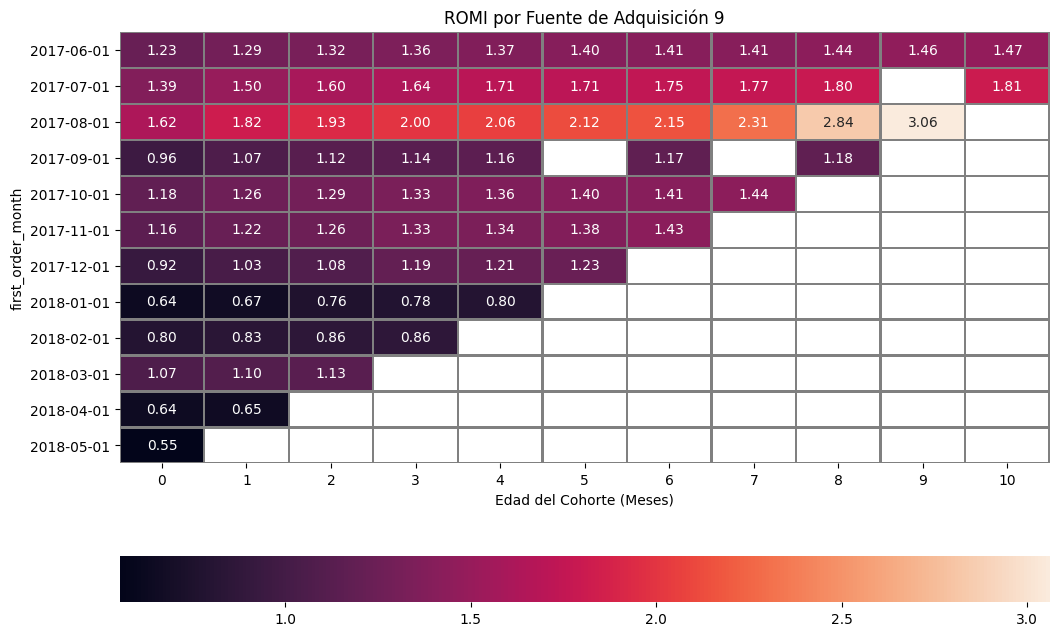

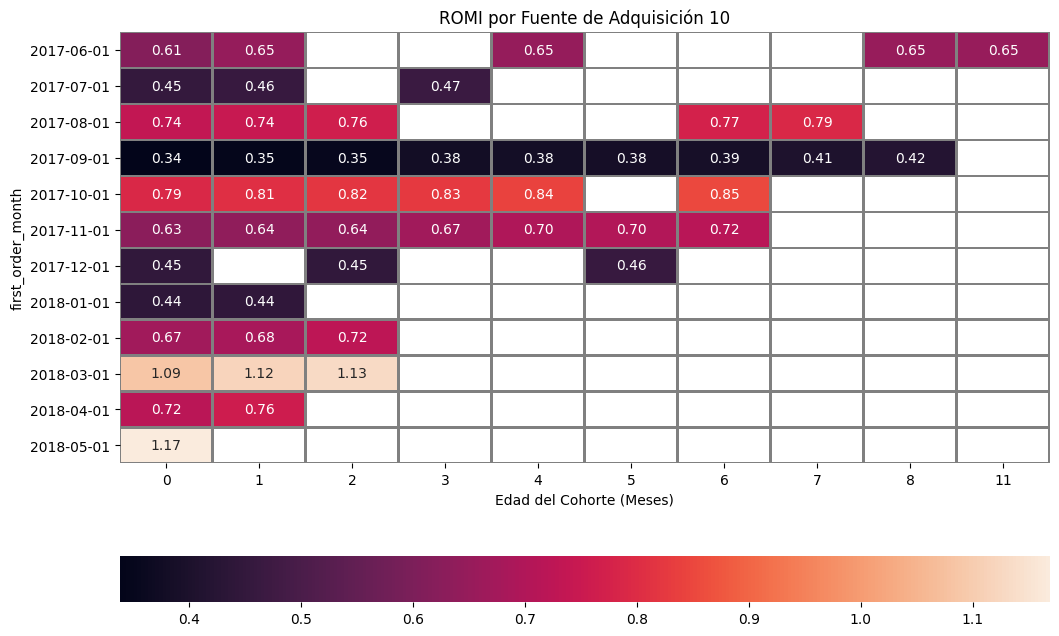

In [26]:
# Primera visita usuarios
first_visit_users = visits.groupby('uid')['start_ts'].min().reset_index()
first_visit_users.columns = ['uid', 'first_visit_ts']

# Mes de primera visita usuarios
first_visit_users['first_visit_month'] = first_visit_users['first_visit_ts'].astype('datetime64[M]')

# Obtener la fuente de la primera visita por usuario
first_visit_users = pd.merge(first_visit_users, visits[['uid', 'source_id']], on='uid', how='left').drop_duplicates(subset='uid')

# Primera orden usuarios
first_order_users = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order_users.columns = ['uid', 'first_order_ts']

# Mes de primera orden usuarios
first_order_users['first_order_month'] = first_order_users['first_order_ts'].astype('datetime64[M]')

# Unir data de primera orden a dataframe orders
orders = pd.merge(orders, first_order_users[['first_order_month', 'uid']], on='uid')

# Obtener mes de compra
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

# Seleccionar columnas a usar de ordenes
buyers = orders[['uid', 'first_order_month', 'revenue', 'order_month']]

# Unir data de ordenes con data de visitas
buyers = pd.merge(buyers, first_visit_users[['uid', 'source_id']], on='uid')

# Generar columna de mes en los costos
costs['month'] = costs['dt'].astype('datetime64[M]')

# Lista de source_ids a considerar
source_ids = [1, 2, 3, 4, 5, 9, 10]

# Iterar sobre cada source_id y generar el ROMI
for source_id in source_ids:
    buyers_source = buyers[buyers['source_id'] == source_id]
    costs_source = costs[costs['source_id'] == source_id]

    # Obtener revenue mensual por cohorte (first_order_month)
    cohorts_revenue_month = buyers_source.groupby(['first_order_month', 'order_month'])['revenue'].sum().reset_index()
    cohorts_revenue_month.columns = ['first_order_month', 'buy_month', 'revenue']

    # Obtener edad de compras de cada cohorte
    cohorts_revenue_month['age_month'] = (
        (pd.to_datetime(cohorts_revenue_month['buy_month']) 
         - pd.to_datetime(cohorts_revenue_month['first_order_month']))
        / np.timedelta64(1, 'M')
    ).round().astype(int)

    # Obtener tamaño de cohortes (cantidad de usuarios únicos por cohorte)
    cohort_sizes = buyers_source.groupby('first_order_month')['uid'].nunique().reset_index()
    cohort_sizes.columns = ['first_order_month', 'n_buyers']

    # Juntar data de tamaño cohortes y revenue cohortes
    cohorts_report = pd.merge(cohort_sizes, cohorts_revenue_month, on='first_order_month')
    cohorts_report['rev_per_buyer'] = cohorts_report['revenue'] / cohorts_report['n_buyers']

    # Obtener costos mensuales de la source
    monthly_costs = costs_source.groupby('month')['costs'].sum().reset_index()

    # Juntar costos a reporte cohorte
    cohorts_report = pd.merge(cohorts_report, monthly_costs, left_on='buy_month', right_on='month')
    cohorts_report.drop(['month'], axis=1, inplace=True)

    # Calculo cac y romi
    cohorts_report['cac'] = cohorts_report['costs'] / cohorts_report['n_buyers']
    cohorts_report['romi'] = cohorts_report['rev_per_buyer'] / cohorts_report['cac']

    # Reporte final
    romi = (
        cohorts_report
        .pivot_table(index='first_order_month', columns='age_month', values='romi', aggfunc='mean')
        .cumsum(axis=1)
    )
    romi.index = romi.index.astype(str)

    # Graficar el heatmap de ROMI para esta fuente
    plt.figure(figsize=(12, 8))
    sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws={'orientation': 'horizontal'})
    plt.title('ROMI por Fuente de Adquisición {}'.format(source_id))
    plt.xlabel('Edad del Cohorte (Meses)')
    plt.show()

## Conclusiones

# Métricas de Usuarios y Sesiones:

__1. Usuarios Únicos por Día, Semana y Mes:__

   - Durante junio a octubre de 2017, observamos un crecimiento constante en el número de usuarios únicos tanto diariamente como mensualmente, con un pico en octubre. Esto sugiere una tendencia positiva en la adquisición de usuarios.
   

__2. Sesiones por Día y Duración Promedio de Sesión:__

   - Las sesiones diarias muestran fluctuaciones, con un promedio de entre 477 y 893 sesiones por día.
   - La duración promedio de la sesión es de 10.72 minutos, mientras que la moda de la duración de la sesión es de 1 minuto. Esto puede indicar diferentes niveles de compromiso entre los usuarios, con una mayoría que interactúa brevemente y una minoría que pasa más tiempo en la plataforma.
   

__3. Frecuencia de Retorno Promedio por Usuario:__

   - Los usuarios muestran patrones variados de retorno, con algunos volviendo en días y otros en semanas. La frecuencia de retorno promedio es de aproximadamente 41 días, con una desviación estándar de 55.97 días. Esto puede influir en las estrategias de retención de usuarios.
   

# Métricas de Ventas:

__1. Categorización de Conversiones:__

   - La mayoría de las conversiones ocurren en el mismo día (26,363 conversiones) o dentro de la semana (2,069 conversiones). Esto sugiere que las campañas de marketing pueden ser efectivas en el corto plazo para la conversión directa.
   
   
__2. Frecuencia de Pedidos por Día, Semana y Mes:__

   - Total de pedidos realizados: 50,415.
   

__Frecuencia de pedidos por día:__

   - Promedio diario: entre 60 y 160 pedidos.
   
   
__Frecuencia de pedidos por semana:__

   - Promedio semanal: entre 340 y 940 pedidos.


__Frecuencia de pedidos por mes:__

   - Promedio mensual: entre 1,800 y 5,679 pedidos.
   

Esto indica oportunidades para campañas promocionales específicas durante estos períodos de alta actividad.
   
__3. Tamaño Promedio de Compra por Usuario:__

   - El tamaño promedio de compra varía ampliamente entre usuarios, desde compras pequeñas hasta grandes, con un promedio general de aproximadamente 5 unidades monetarias.
   

__4. Lifetime Value (LTV):__

   - El LTV promedio por usuario es significativamente mayor que el tamaño promedio de compra, indicando un valor a largo plazo de los usuarios más allá de una sola compra. Los datos muestran un LTV creciente con el tiempo, especialmente para cohortes de usuarios más antiguas.


# Métricas de Marketing: 

__1. Gastos Totales en Marketing y por Fuente de Adquisición:__

Se ha invertido un total de 329,131.62 unidades monetarias en marketing, distribuidos de manera desigual entre diferentes fuentes de adquisición.
Costo de Adquisición de Clientes (CAC) y ROMI:

- Total de gastos en marketing: 329,131.62 unidades monetarias.
- Gastos por fuente de adquisición:
   - Fuente 1: 20,833.27
   - Fuente 2: 42,806.04
   - Fuente 3: 141,321.63
   - Fuente 4: 61,073.60
   - Fuente 5: 51,757.10
   - Fuente 9: 5,517.49
   - Fuente 10: 5,822.49
   
   
__2. Costo de Adquisición de Clientes (CAC):__
- CAC promedio por fuente de adquisición:
  - Fuente 1: 7.20
  - Fuente 2: 12.60
  - Fuente 3: 18.02
  - Fuente 4: 7.53
  - Fuente 5: 8.39
  - Fuente 9: 5.44
  - Fuente 10: 7.09
   
   
__3. Rentabilidad de las Inversiones (ROMI):__

- ROMI por fuente de adquisición:


  - Fuente 1: ROMI muestra un aumento constante con un valor de 4.29 en el mes 11.
  - Fuente 2: ROMI tiene una tendencia ascendente, alcanzando un valor de 1.96 en el mes 11.  
  - Fuente 3: ROMI permanece relativamente bajo, con un máximo de 0.35 en el mes 11.
  - Las otras fuentes muestran ROMIs variables, con algunas fuentes alcanzando valores significativos en meses específicos.


__Recomendaciones:__


__1. Aumentar la inversión en fuentes con alto ROMI:__


Fuentes como la Fuente 1 y la Fuente 9 muestran un ROMI significativo, lo que sugiere que estas son eficaces en la conversión de usuarios en clientes rentables. Sería prudente aumentar la inversión en estas fuentes para maximizar el retorno.

__2. Optimizar campañas en períodos de alta actividad:__


Dado que las ventas y las conversiones muestran picos semanal y mensualmente, recomendaría planificar campañas promocionales específicas durante estos períodos para capitalizar la alta actividad de compra.

__3. Mejorar la retención a largo plazo:__


Dado que algunos usuarios muestran un alto intervalo de retorno, es crucial implementar estrategias de retención para aumentar la fidelización a largo plazo. Esto puede incluir programas de fidelización, comunicación personalizada y ofertas exclusivas para usuarios recurrentes.

__4. Monitorear y ajustar continuamente:__


Dado que el comportamiento del usuario y las métricas de marketing pueden cambiar con el tiempo, es importante monitorear regularmente las métricas clave y ajustar las estrategias de marketing según sea necesario.